In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn import preprocessing

In [2]:
df = pd.read_csv("../assets/data/2019-UT-ASD-Full/2019-UT-ASD-scrapped.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111268 entries, 0 to 111267
Data columns (total 87 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       111268 non-null  int64  
 1   Date                             111268 non-null  object 
 2   RideId                           111268 non-null  int64  
 3   TrainId                          111268 non-null  int64  
 4   DepartureStation                 110338 non-null  object 
 5   DepartureTime                    110328 non-null  object 
 6   DepartureDelay                   111268 non-null  float64
 7   DestinationStation               110195 non-null  object 
 8   ArrivalTime                      110195 non-null  object 
 9   ArrivalDelay                     111268 non-null  float64
 10  DeparturePlatform                110333 non-null  object 
 11  ArrivalPlatform                  110193 non-null  object 
 12  De

In [4]:
Xy = df[['TrainId', 'DepartureWindSpeed', 
                   'DepartureVisibility', 'DepartureFog', 'DepartureRain', 'DepartureSnow', 
                   'DepartureThunder', 'DepartureIceFormation', 'DestinationFog', 'DestinationRain','DestinationSnow', 'DestinationThunder', 
                   'DestinationWindSpeed', 'DestinationVisibility', 'DestinationIceFormation', 'ArrivalDelay']]

In [5]:
Xy.isna().sum()

TrainId                       0
DepartureWindSpeed         1078
DepartureVisibility        1078
DepartureFog               1078
DepartureRain              1078
DepartureSnow              1078
DepartureThunder           1078
DepartureIceFormation      1078
DestinationFog             1076
DestinationRain            1076
DestinationSnow            1076
DestinationThunder         1076
DestinationWindSpeed       1076
DestinationVisibility      1076
DestinationIceFormation    1076
ArrivalDelay                  0
dtype: int64

In [6]:
#The NA values otherwise break all the predictions
Xy = Xy.dropna()

In [7]:
Xy.dtypes

TrainId                      int64
DepartureWindSpeed         float64
DepartureVisibility        float64
DepartureFog               float64
DepartureRain              float64
DepartureSnow              float64
DepartureThunder           float64
DepartureIceFormation      float64
DestinationFog             float64
DestinationRain            float64
DestinationSnow            float64
DestinationThunder         float64
DestinationWindSpeed       float64
DestinationVisibility      float64
DestinationIceFormation    float64
ArrivalDelay               float64
dtype: object

In [8]:
X = Xy[['TrainId', 'DepartureWindSpeed', 
                   'DepartureVisibility', 'DepartureFog', 'DepartureRain', 'DepartureSnow', 
                   'DepartureThunder', 'DepartureIceFormation', 'DestinationFog', 'DestinationRain','DestinationSnow',
                    'DestinationThunder', 'DestinationWindSpeed', 'DestinationVisibility', 'DestinationIceFormation']]
y = Xy['ArrivalDelay']

# Scaling and splitting data

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(y.values.reshape(-1,1))

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.2)

In [11]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(88152, 15) (22038, 15) (88152,) (22038,)


# Neural network with tensorflow

In [12]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(15,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train,
          batch_size=32, epochs=50)

Epoch 1/50
2755/2755 [==============================] - 2s 534us/step - loss: 0.2549 - accuracy: 0.0343
Epoch 2/50
2755/2755 [==============================] - 1s 539us/step - loss: -0.7422 - accuracy: 0.0653
Epoch 3/50
2755/2755 [==============================] - 1s 539us/step - loss: -7.2533 - accuracy: 0.0883
Epoch 4/50
2755/2755 [==============================] - 1s 540us/step - loss: -16.6192 - accuracy: 0.1133
Epoch 5/50
2755/2755 [==============================] - 2s 549us/step - loss: -62.9369 - accuracy: 0.1143
Epoch 6/50
2755/2755 [==============================] - 2s 545us/step - loss: -122.1826 - accuracy: 0.0868
Epoch 7/50
2755/2755 [==============================] - 2s 544us/step - loss: -177.8158 - accuracy: 0.0971
Epoch 8/50
2755/2755 [==============================] - 2s 545us/step - loss: -304.4106 - accuracy: 0.1079
Epoch 9/50
2755/2755 [==============================] - 2s 548us/step - loss: -472.1526 - accuracy: 0.1013
Epoch 10/50
2755/2755 [=======================

In [15]:
print(f'The accuracy is {model.evaluate(X_test, Y_test)[1]*100}')

689/689 [==============================] - 0s 401us/step - loss: -97804.4531 - accuracy: 0.1001
The accuracy is 10.00998243689537


In [16]:
predictions= model.predict(X_test)
predictions = min_max_scaler.inverse_transform(predictions)

In [17]:
np.count_nonzero(~np.isnan(predictions))

22038

In [18]:
predictions.size

22038

**Evaluating the model on mean squared error**

In [19]:
mean_squared_error(Y_test, predictions, squared=False)

242.90353338353756

# Decision Tree Regression

In [20]:
regressor = DecisionTreeRegressor(random_state=0)

In [21]:
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
df_dtr = pd.DataFrame(Y_test)
df_dtr['PredictedDelay'] = y_pred

In [27]:
df_dtr.sort_index()

,ArrivalDelay,PredictedDelay
8,1.0,0.0
36,1.0,0.0
40,0.0,0.0
47,0.0,0.0
50,0.0,0.0
...,...,...
111236,3.0,0.0
111238,0.0,0.0
111240,1.5,0.0
111252,0.0,7.0


In [28]:
df_dtr.loc[df_dtr['ArrivalDelay']>25].head(50)

,ArrivalDelay,PredictedDelay
23363,49.0,49.000000
67955,39.0,0.000000
40047,72.0,0.000000
93840,180.0,180.000000
93652,30.0,0.000000
107024,32.0,0.000000
104975,53.0,0.000000
101163,89.0,89.000000
25168,29.0,29.000000
63313,31.0,31.000000


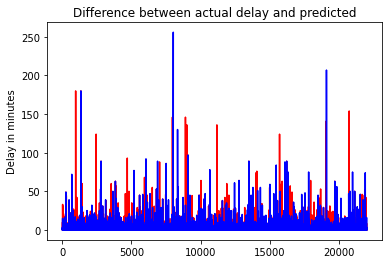

In [29]:
plt.plot(y_pred, color = 'red')
viz = np.array(Y_test)
plt.plot(viz, color = 'blue')
plt.title('Difference between actual delay and predicted')
plt.ylabel('Delay in minutes')
plt.show()

**Evaluating the model on mean squared error**

In [30]:
mean_squared_error(Y_test, y_pred, squared=False)

5.822959991149753

In [31]:
correlation_matrix = np.corrcoef(y_pred, Y_test)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f'The R squared value on the decision tree regressor model is {r_squared}')

The R squared value on the decision tree regressor model is 0.1127727646074527


# SVR

In [32]:
sc_X = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()
X_sc = sc_X.fit_transform(X)
y_sc = sc_y.fit_transform(y.values.reshape(-1,1))

In [33]:
X_train_svr, X_test_svr, Y_train_svr, Y_test_svr = train_test_split(X_sc, y_sc, test_size=0.2)

In [12]:
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train_svr, np.ravel(Y_train_svr))

SVR()

In [14]:
y_pred_svr = regressor_svr.predict(X_test_svr) 

In [62]:
y_pred_svr = sc_y.inverse_transform(y_pred_svr)
Y_test_svr = sc_y.inverse_transform(Y_test_svr)

In [63]:
y_pred_svr

array([3.1296253 , 3.12748074, 3.1242697 , ..., 3.12869473, 3.10020592,
       3.12352575])

**Evaluating the model on mean squared error**

In [64]:
mean_squared_error(Y_test_svr, y_pred_svr, squared=False)

5.14786528979707